<font size ="6" > 1. Exploratory Data Analysis (EDA) </font>


####Days_left is a categorical!!!!


<font size ="5" > Import Data and Packages </font>
<li> Removing index column</li>

In [216]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("C:/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/Clean_Dataset.csv")
df = df.drop('Unnamed: 0', axis=1)

# Display the first few rows of the DataFrame
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<font size ="5" > Summary Statistics </font>


In [217]:
df.describe(include = "all")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [218]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [219]:
df = df.dropna(axis=0)

In [220]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9], include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.750000,7.000000,3389.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000


<font size ="6" > 2. Data visualization </font>
<li>Checking whethere there are any outliers</li>
<li>Getting the distribution of numerical data </li>
<li> Checking if there is a relationship between variables </li>

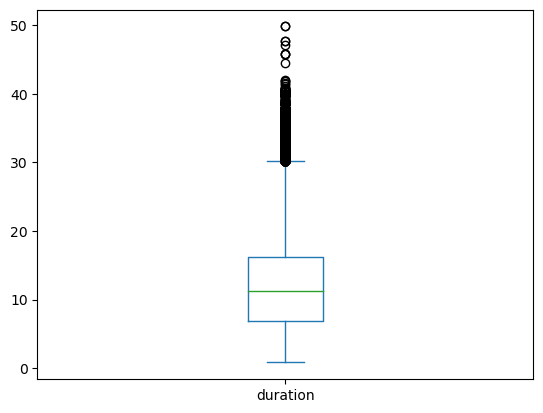

In [221]:
df[['duration']].plot(kind='box')
plt.show()

<Axes: >

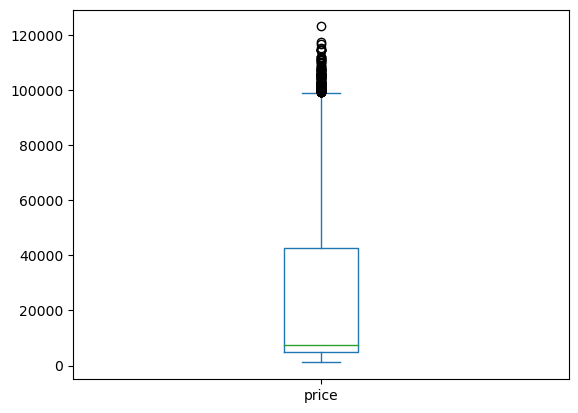

In [222]:
df[['price']].plot(kind='box')

<font size = "3">From the boxplots, there is evidence that there are outliers for the durtaion as well as the price variable. To get a better visualisation of the distribution, we plot histograms. </font>

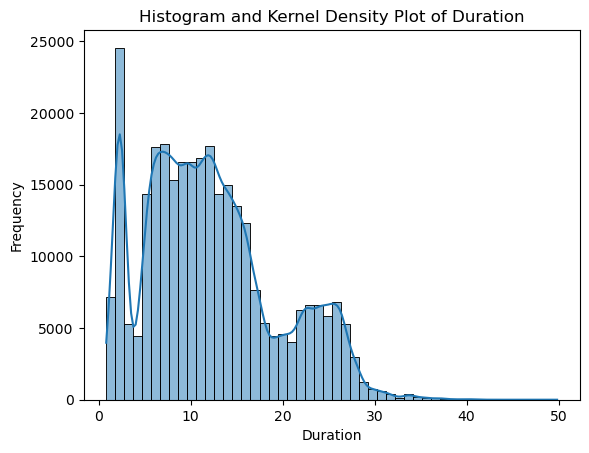

In [223]:
sns.histplot(df['duration'], bins= 50, kde=True)
plt.title('Histogram and Kernel Density Plot of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

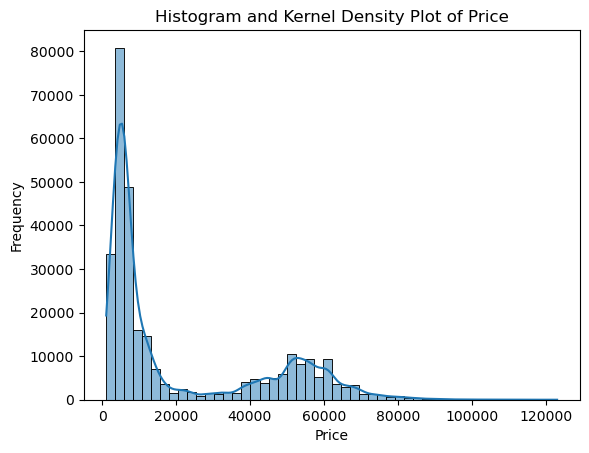

In [224]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram and Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<font size = "3">From the histograms, the distribution of duration  is skewed to the right. The distribution of days left is normally distributed, and the distribution of price is also skewed to the right. </font>

<font size = "3"> Next, scatter plots can be used to visualise any relationship between the numerical variables<font>

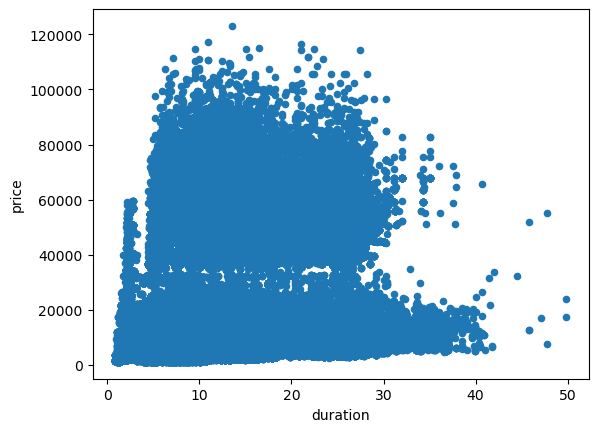

In [225]:
df[['duration', 'price']].plot(kind='scatter', x='duration', y='price')
plt.show()

There seems to be positive linera relationship between the price and duration

<font size = "6"> 3. Data Processing </font>
<font size = "3"><li>Removing all outliers from duration and price variable using standard deviation</li>
<li>Transforming the duration variable using log transformation and transforming the price variable using boxcox transformation </li>
<li>Standardising the scale of all the numerical variable </li></font>

In [226]:
## removing outliers 
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd

    return (low, high)

for col_name in ['duration', 'price']:
    lower, upper = three_sd_range(df[col_name])
    has_outlier = (df[col_name].min() < lower) or (df[col_name].max() > upper)
    print(col_name + ' has outliers: ' + str(has_outlier))

    if has_outlier:
        # Remove outliers
        curr_length = df[col_name].count()
        df = df[ (df[col_name]>=lower) & (df[col_name]<=upper)]
        new_length = df[col_name].count()
        row_removed = curr_length - new_length
        print(str(row_removed) + ' row will be removed from ')

    print()



duration has outliers: True
722 row will be removed from 

price has outliers: True
595 row will be removed from 



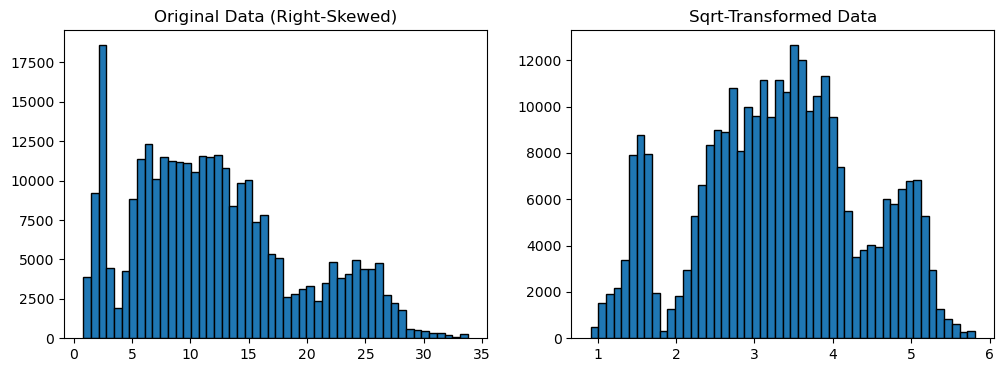

In [227]:
## log transforming the right skewed data: duration and price
import numpy as np
import matplotlib.pyplot as plt
sqrt_transformed_data = np.sqrt(df['duration'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=50, edgecolor='black')
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(sqrt_transformed_data, bins=50, edgecolor='black')
plt.title('Sqrt-Transformed Data')
plt.show()
df['duration_sqrt'] = np.sqrt(df['duration'])

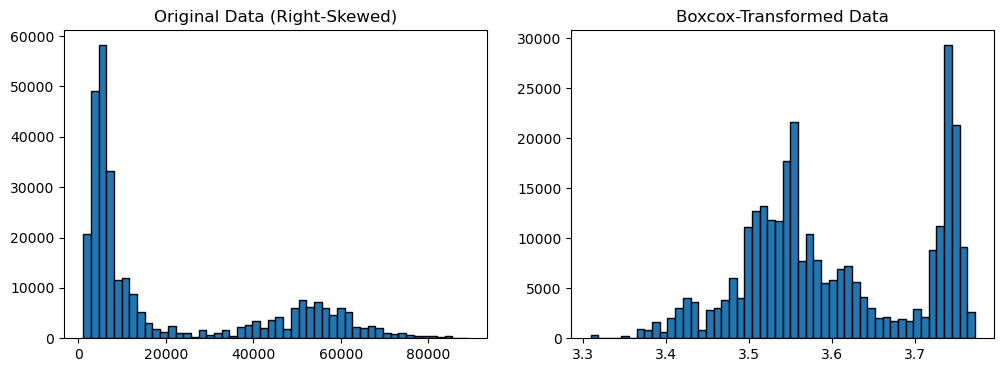

In [228]:
from scipy.stats import boxcox
boxcox_transformed_data, _ = boxcox(df['price'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(boxcox_transformed_data, bins=50, edgecolor='black')
plt.title('Boxcox-Transformed Data')
plt.show()
df['price_boxcox'] = boxcox_transformed_data


In [229]:
from sklearn.preprocessing import StandardScaler
variables = ['duration_sqrt', 'price_boxcox']
x = df[variables]
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=[f'{col}_scaled' for col in variables])
df  = pd.concat([df, x], axis=1)
df = df.drop('duration_sqrt', axis = 1)
df = df.drop('price_boxcox', axis = 1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_sqrt_scaled,price_boxcox_scaled
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,-1.735912,-0.498010
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,-1.685797,-0.498010
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,-1.735912,-0.497464
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,-1.710632,-0.497646
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,-1.685797,-0.497646


In [230]:
df.dropna(inplace=True)
df['days_left'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [231]:
bins = [0,7,14,21,28,35,42,50]
df['days_left_binned'] = pd.cut(df['days_left'], bins=bins, labels=False, right=False)

In [232]:
column_to_move = 'days_left_binned'
moved_column = df.pop(column_to_move)
df.insert(10, column_to_move, moved_column)
df = df.drop("duration", axis=1)
df = df.drop("days_left", axis=1)
df = df.drop("price", axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt_scaled,price_boxcox_scaled
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0,-1.735912,-0.498010
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.498010
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0,-1.735912,-0.497464
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0,-1.710632,-0.497646
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.497646


In [233]:
#storing the data frame so that it can be used across all notebooks
%store df

Stored 'df' (DataFrame)


In [234]:
df.to_csv("C:/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df.csv")

In [235]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt_scaled,price_boxcox_scaled
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0,-1.735912,-0.498010
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.498010
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0,-1.735912,-0.497464
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0,-1.710632,-0.497646
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.497646
...,...,...,...,...,...,...,...,...,...,...,...
298831,Vistara,UK-828,Chennai,Early_Morning,one,Night,Hyderabad,Business,3,-0.137069,1.493494
298832,Vistara,UK-824,Chennai,Night,one,Afternoon,Hyderabad,Business,3,-0.087181,1.555722
298833,Vistara,UK-826,Chennai,Afternoon,one,Early_Morning,Hyderabad,Business,3,0.373988,1.570295
298834,Vistara,UK-822,Chennai,Morning,one,Early_Morning,Hyderabad,Business,3,-0.148929,1.587833


In [236]:
# Load the preprocessed data
df = pd.read_csv("C:/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df.csv")

In [237]:
print(df.columns)

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class',
       'days_left_binned', 'duration_sqrt_scaled', 'price_boxcox_scaled'],
      dtype='object')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2580
[LightGBM] [Info] Number of data points in the train set: 238021, number of used features: 1161
[LightGBM] [Info] Start training from score -0.001002
Root Mean Squared Error: 0.31807408933692


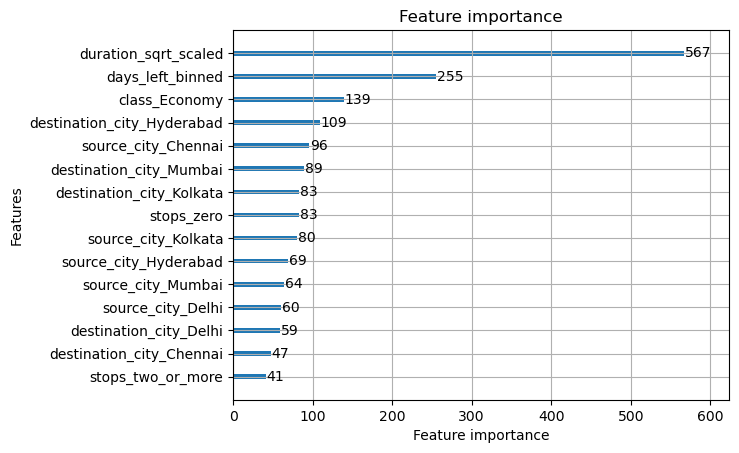

In [238]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Load the DataFrame
df = pd.read_csv("C:/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df.csv")

# Drop the unnecessary index column and the target column
X = df.drop(['Unnamed: 0', 'price_boxcox_scaled'], axis=1)
y = df['price_boxcox_scaled']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'reg_alpha': 0.2,  # L1 regularization parameter
    'reg_lambda': 0.2  # L2 regularization parameter
}

# Train the model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

# Plot feature importance
lgb.plot_importance(bst, max_num_features=15) # Change max_num_features to display desired number of features
plt.show()

## Cross-Validation

In [122]:
import lightgbm as lgb
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
num_folds = 30
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an array to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_idx, val_idx in kf.split(X_train, y_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Create LightGBM datasets
    train_data_fold = lgb.Dataset(X_train_fold, label=y_train_fold)
    val_data_fold = lgb.Dataset(X_val_fold, label=y_val_fold)
    
    # Train the model
    bst_fold = lgb.train(params, train_data_fold, num_boost_round=num_round, valid_sets=[val_data_fold])
    
    # Predict on the validation set and calculate RMSE
    y_pred_val = bst_fold.predict(X_val_fold, num_iteration=bst_fold.best_iteration)
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
    
    # Store the RMSE score
    cv_scores.append(rmse_fold)

# Convert scores to numpy array
cv_scores = np.array(cv_scores)

# Calculate mean and standard deviation of cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Cross-Validation RMSE: {:.4f} +/- {:.4f}".format(cv_mean, cv_std))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data points in the train set: 230086, number of used features: 1152
[LightGBM] [Info] Start training from score -0.001135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2536
[LightGBM] [Info] Number of data points in the train set: 230087, number of used features: 1139
[LightGBM] [Info] Start training from score -0.001032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2548
[LightGBM] [Info] Number of data points in the train set: 230087, number of used features: 1145
[LightGBM] [Info] Start training from score -0.001228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2544
[LightGBM] [Info] Number of data points in the train set: 230087, number of used features: 1143
[LightGBM] [Info] Start training from score -0.001216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

##### Cross-Validation RMSE (Mean)
The average RMSE value across all folds of the cross-validation process. In this case, it indicates the average difference between the actual flight prices and the predicted prices made by the model. A lower RMSE value indicates better performance, as it means the model's predictions are closer to the actual prices on average.

##### Standard Deviation of Cross-Validation RMSE
The variability or spread of RMSE values across different folds of the cross-validation. A smaller standard deviation indicates that the RMSE values from different folds are closer to the mean, suggesting that the model's performance is consistent across different subsets of the data. In contrast, a larger standard deviation may indicate that the model's performance varies significantly depending on the subset of data used for training and validation.

Overall, a cross-validation RMSE of 0.3132 with a standard deviation of 0.0012 suggests that the model has good predictive performance and is consistent across different subsets of the data. However, it's essential to consider other factors such as the specific requirements of your application and whether the RMSE value meets your desired level of accuracy.

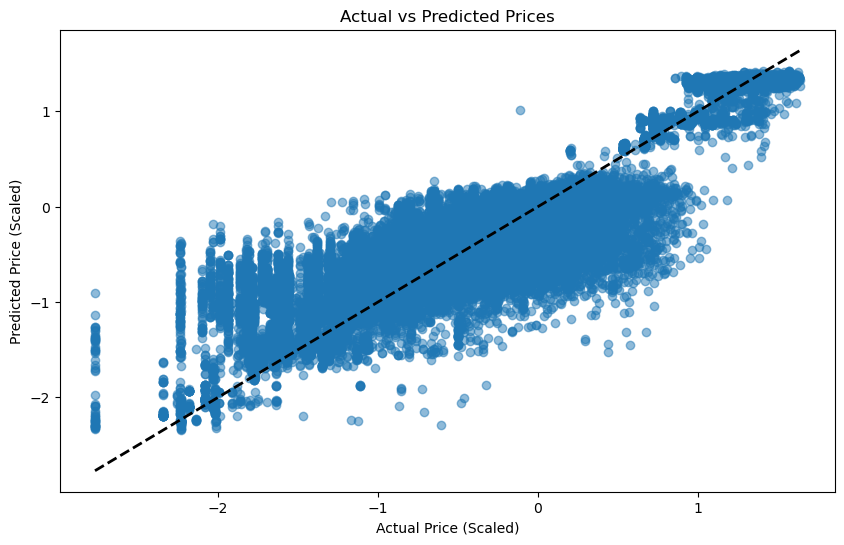

In [239]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price (Scaled)')
plt.ylabel('Predicted Price (Scaled)')
plt.title('Actual vs Predicted Prices')
plt.show()

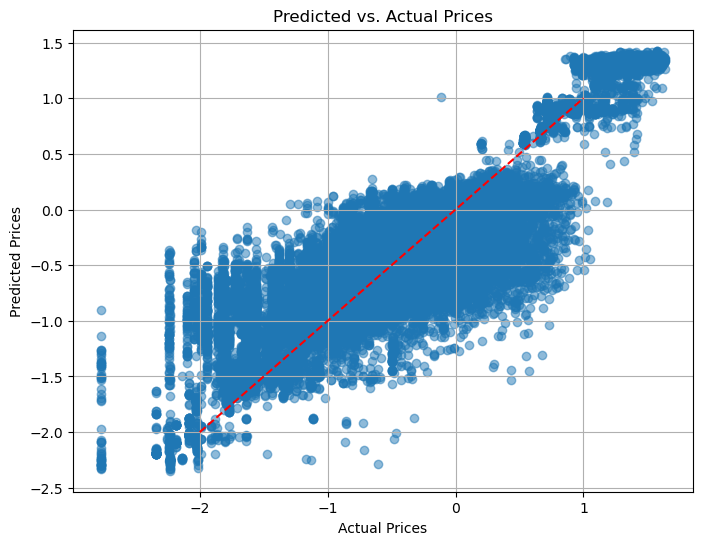

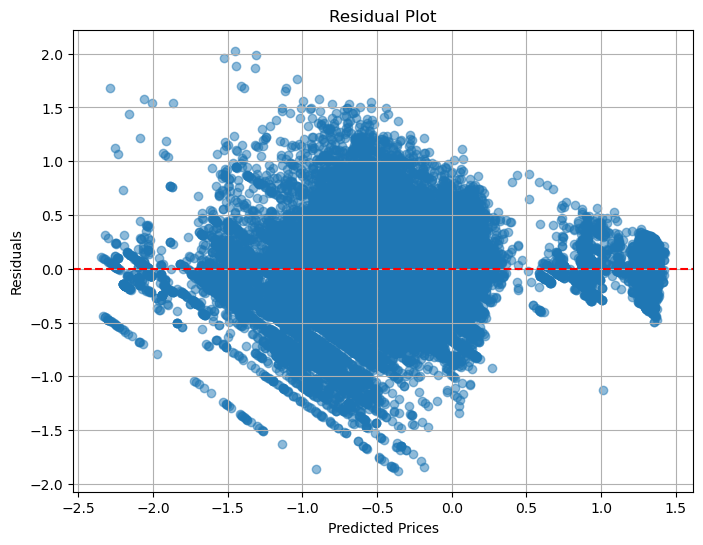

In [240]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([-2, 1], [-2, 1], color='red', linestyle='--')  # Plot diagonal line for reference
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Plot horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Auto-choosing row-wise multi-threading: LightGBM automatically chooses row-wise multi-threading to optimize performance. It mentions the overhead time spent on testing, which is negligible (0.002944 seconds). It suggests setting force_row_wise=true to remove this overhead if needed.

Total Bins: LightGBM indicates the total number of bins created for splitting features. Binning is a technique used to discretize continuous features into smaller intervals, which helps in building the decision trees.

Number of data points in the train set and number of used features: LightGBM shows the number of data points (rows) and the number of features (columns) used in the training set.

Start training from score: LightGBM starts training from a certain initial score, which is typically the mean or median of the target variable.

Root Mean Squared Error: Finally, LightGBM prints the Root Mean Squared Error (RMSE) calculated on the test set. This is the evaluation metric used to measure the performance of the trained model. In this case, the RMSE is approximately 0.31698. Lower values of RMSE indicate better model performance.

## Import Libraries

Import the necessary libraries

In [250]:
import lightgbm as lgb
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Data

Load dataset

In [251]:
# Load the DataFrame
df = pd.read_csv("C:/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df.csv")

In [252]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297527 entries, 0 to 297526
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            297527 non-null  int64  
 1   airline               297527 non-null  object 
 2   flight                297527 non-null  object 
 3   source_city           297527 non-null  object 
 4   departure_time        297527 non-null  object 
 5   stops                 297527 non-null  object 
 6   arrival_time          297527 non-null  object 
 7   destination_city      297527 non-null  object 
 8   class                 297527 non-null  object 
 9   days_left_binned      297527 non-null  int64  
 10  duration_sqrt_scaled  297527 non-null  float64
 11  price_boxcox_scaled   297527 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 27.2+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt_scaled,price_boxcox_scaled
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0,-1.735912,-0.498010
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.498010
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0,-1.735912,-0.497464
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0,-1.710632,-0.497646
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.497646


## Prepare Data

In [253]:
# Define features (X) and target variable (y)

# Drop Unnamed: 0 index column
X = df.drop(['Unnamed: 0', 'class'], axis=1)
y = df['class']

# Convert categorical variables into dummy/indicator variables if needed
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model

In [254]:
# Initialize the LightGBM classifier
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 164687, number of negative: 73334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2847
[LightGBM] [Info] Number of data points in the train set: 238021, number of used features: 1168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691901 -> initscore=0.809022
[LightGBM] [Info] Start training from score 0.809022


LGBMClassifier()

## Evaluate the Model

In [255]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9997647296070984
Classification Report:
              precision    recall  f1-score   support

    Business       1.00      1.00      1.00     18186
     Economy       1.00      1.00      1.00     41320

    accuracy                           1.00     59506
   macro avg       1.00      1.00      1.00     59506
weighted avg       1.00      1.00      1.00     59506

Confusion Matrix:
[[18185     1]
 [   13 41307]]


## Classification Report

In [274]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

    Business       1.00      1.00      1.00     18186
     Economy       1.00      1.00      1.00     41320

    accuracy                           1.00     59506
   macro avg       1.00      1.00      1.00     59506
weighted avg       1.00      1.00      1.00     59506



## Plotting Confusion Matrix

In [265]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.2/10.6 MB 36.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.6 MB 42.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/10.6 MB 40.4 MB/s eta 0:00:01
   ---------------------- ----------------- 6.1/10.6 MB 42.8 MB/s eta 0:00:01
   ---------------------------- ----------- 7.5/10.6 MB 39.9 MB/s eta 0:00:01
   ---------------------------- ----------- 7.5/10.6 MB 39.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------  10.4/10.6 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 31.2 MB/s eta 0:00:00
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [266]:
import sklearn
print(sklearn.__version__)

1.3.0


[LightGBM] [Info] Number of positive: 164687, number of negative: 73334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2847
[LightGBM] [Info] Number of data points in the train set: 238021, number of used features: 1168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691901 -> initscore=0.809022
[LightGBM] [Info] Start training from score 0.809022


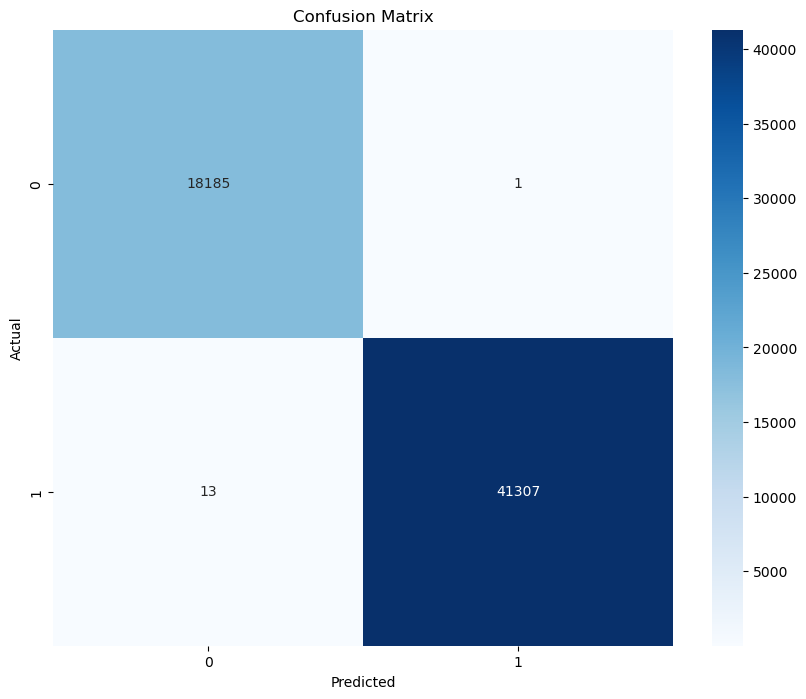

In [272]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model with evaluation set
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')

# Get predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Plotting Feature Importance

<Figure size 100000x80000 with 0 Axes>

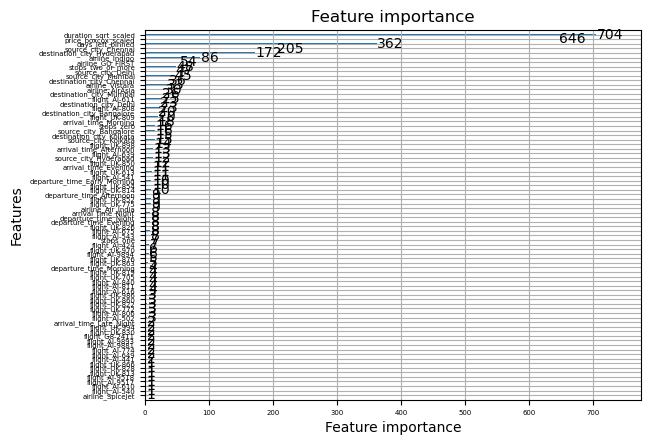

In [256]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1000, 800))  # Adjust the figure size as needed

ax = lgb.plot_importance(model)
plt.xticks(fontsize=5)  # Adjust font size as needed
plt.yticks(fontsize=5)  # Adjust font size as needed
plt.show()

## Plotting Decision Trees

In [278]:
import graphviz

In [279]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


ImportError: You must install graphviz and restart your session to plot tree.

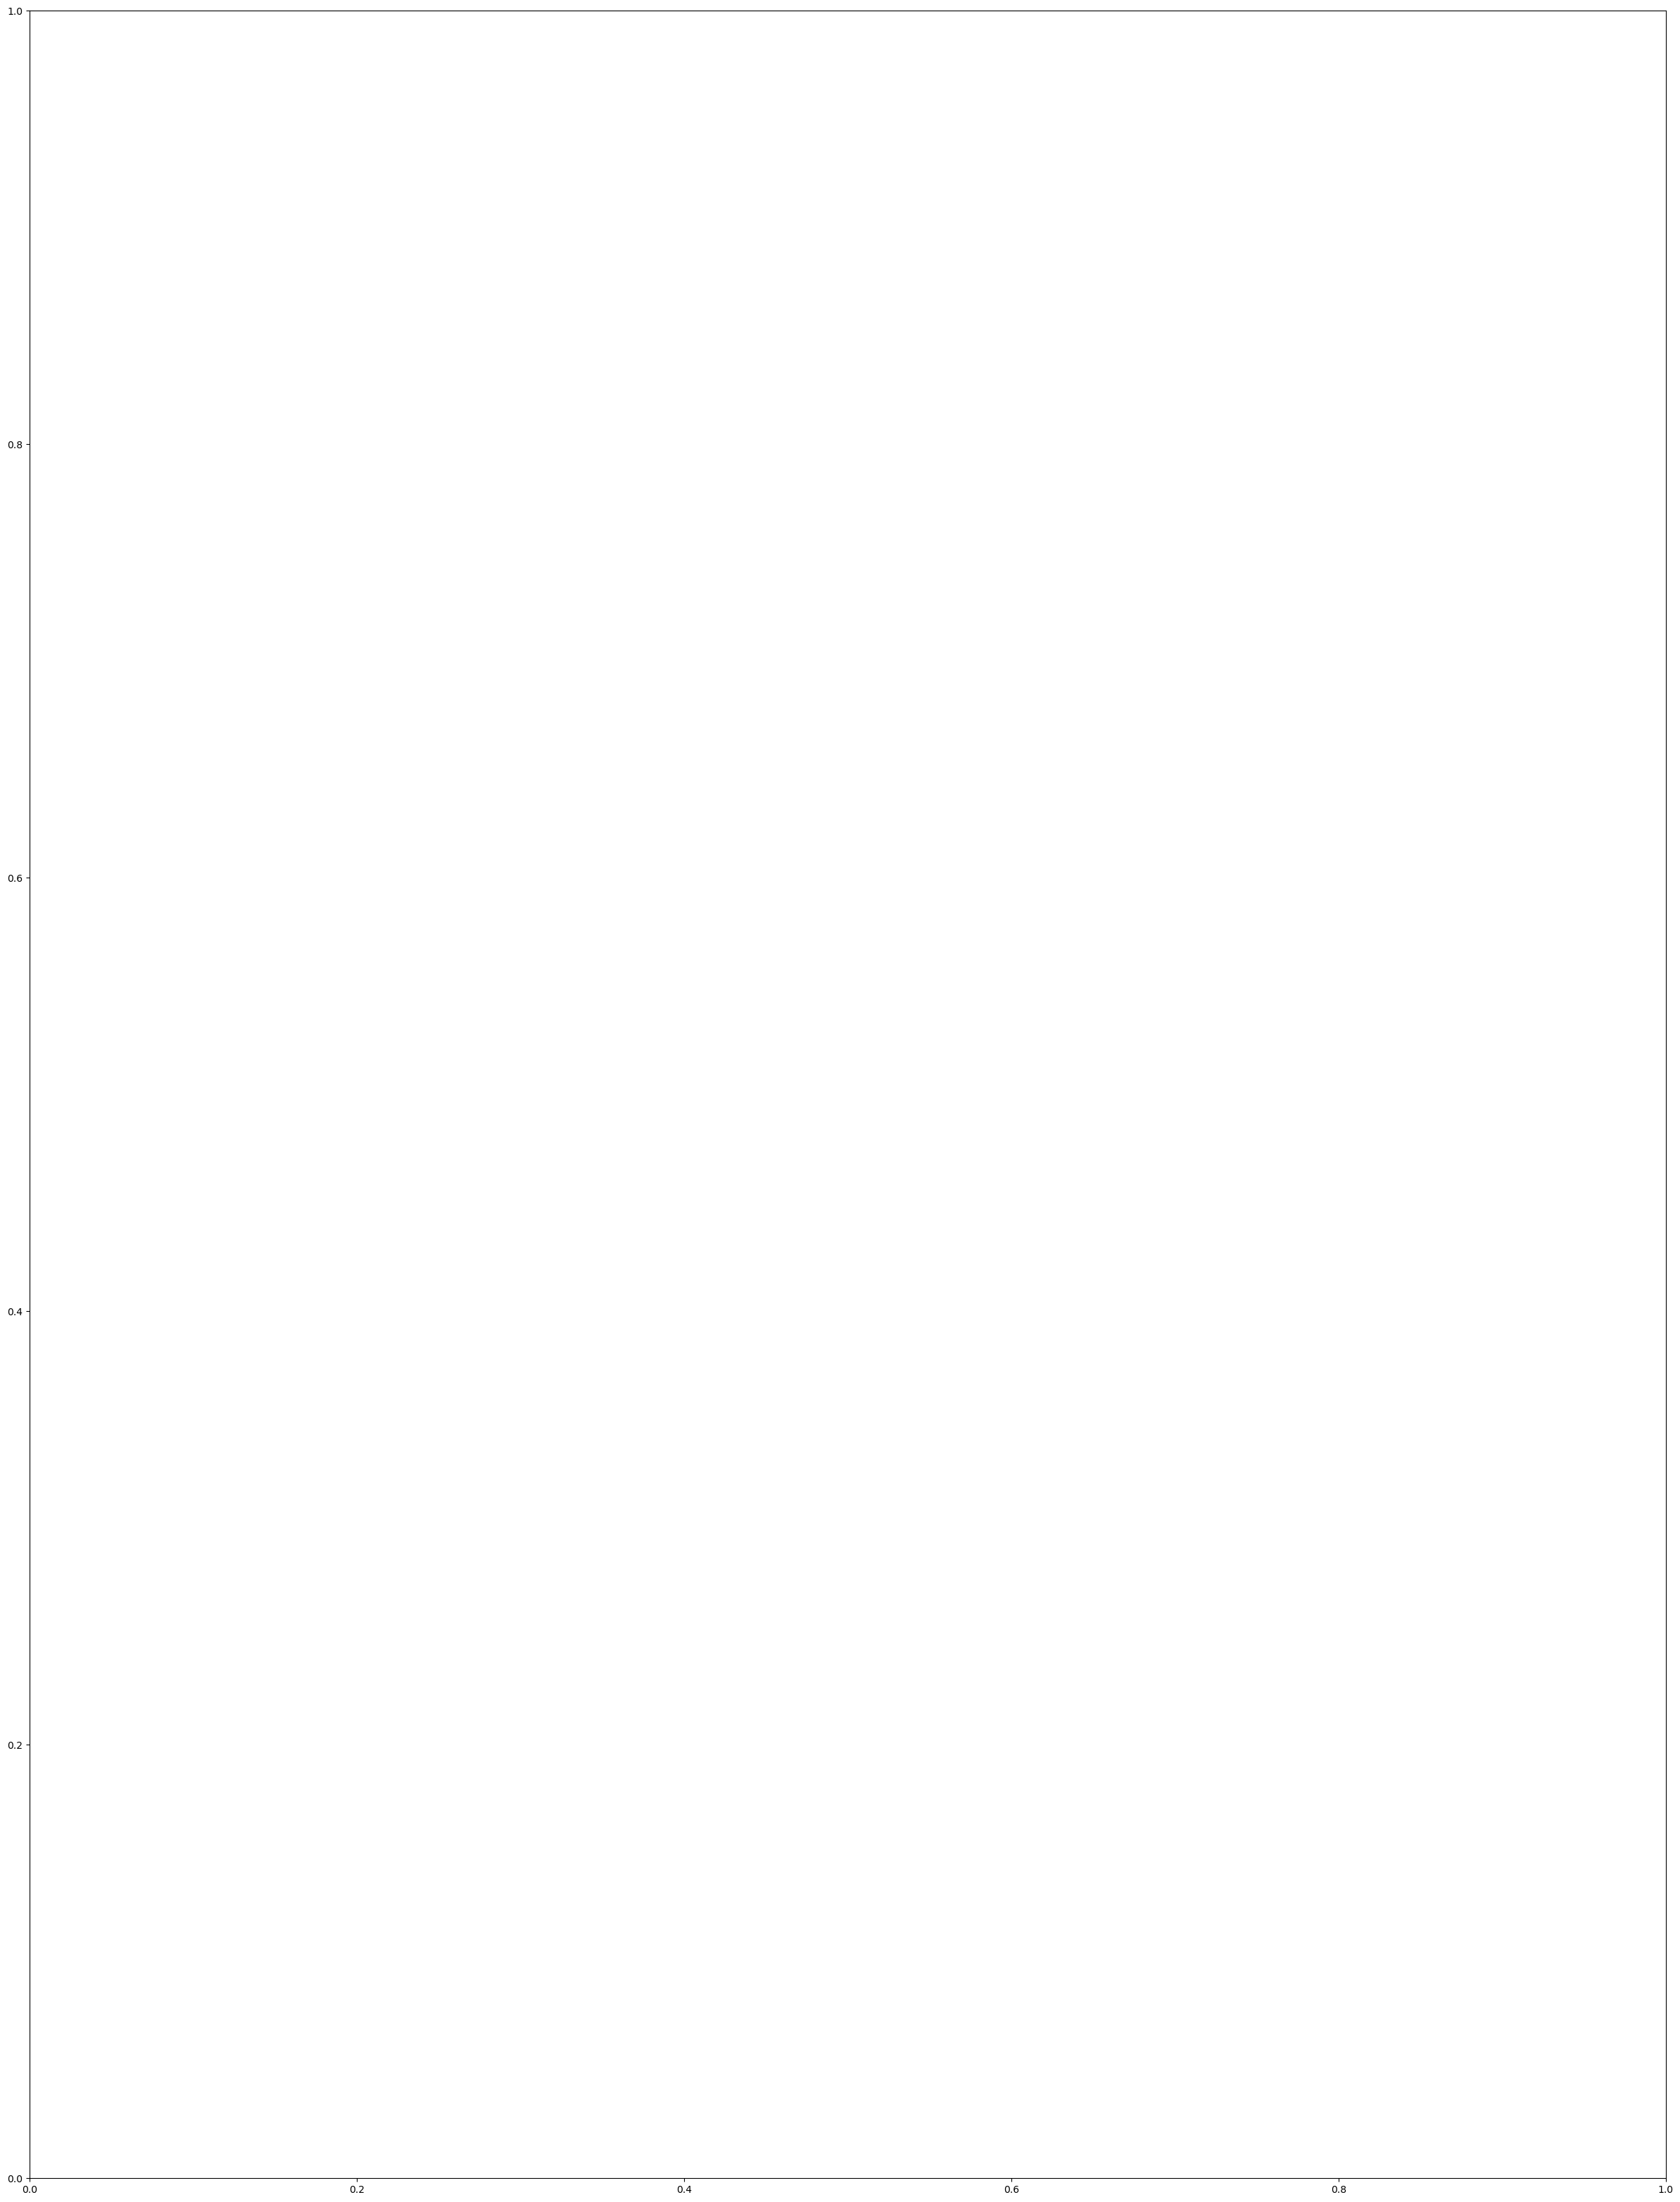

In [280]:
import os
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
os.environ["PATH"] += os.pathsep + 'c:/users/redmi/anaconda3/lib/site-packages'  
# Replace this with the path to Graphviz on laptop system

# Plot tree
lgb.plot_tree(model, figsize=(30, 40), show_info=['split_gain'])
plt.show()

## Plotting Metric Evaluation

In [286]:
lgb.plot_metric(model)

NotFittedError: No results found. Need to call fit with eval_set beforehand.